In [4]:
%matplotlib inline
import os 
import numpy as np
from numpy import mean, std
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind, mannwhitneyu, wilcoxon
import statsmodels.api as sm
pd.options.display.max_columns = 99
import statsmodels.formula.api as smf
import math 
import scipy.stats as ss
plt.rcParams['font.family'] = 'Myriad Pro'
sns.set_style('white')

clinical_dir  = '/Users/kanaan/SCR/Dataframes_20150820/DF_clinical/'
measures = [ #'Age','SNR' , 'CNR' , 'FBER',  'QI1', 
            # 'R_Caud', 'L_Caud', 'R_Puta', 'L_Puta', 'R_Pall', 'L_Pall',
            # 'R_Amyg', 'L_Amyg', 'R_Hipp', 'L_Hipp', 'R_Accu', 'L_Accu',
            # 'R_Thal', 'L_Thal', 'L_Insula', 'R_Insula', 'L_Cingulum', 'R_Cingulum', 
            # 'L_ant_Insula', 'R_ant_Insula', 'L_inf_Insula', 'R_inf_Insula',  'L_sup_Insula', 'R_sup_Insula', 
            # 'L_ant_Cingulum', 'R_ant_Cingulum', 'L_ant_mid_Cingulum', 'R_ant_mid_Cingulum',
            # 'L_post_mid_Cingulum', 'R_post_mid_Cingulum', 'L_post_dors_Cingulum',
            # 'R_post_dors_Cingulum','L_post_vent_Cingulum', 'R_post_vent_Cingulum', 
            # 'L_RN', 'R_RN', 'L_STN', 'R_STN', 'L_SN', 'R_SN',
             'Caud', 'Puta', 'Pall', 'Thal', 'Accu', 'Amyg', 'Hipp', 'RN', 'SN','STN',
             'Insula', 'ant_Insula', 'inf_Insula', 'sup_Insula',
             'Cingulum', 'post_mid_Cingulum', 'post_dors_Cingulum','post_vent_Cingulum', 'ant_Cingulum', 'ant_mid_Cingulum',
            'BrainStem', 'BasalGanglia'
            ]

drop_c =  []
drop_p = ['NL2P', 'STDP', 'HSPP', 'CB4P', 'SA5U']  # Based on quality control of MP2RAGE_UNI 


In [5]:
datadir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Presentations/2016_06_ESSTS_QSM'
iron_controls = pd.read_csv(os.path.join(datadir, 'controls_a.csv'), index_col = 0)
iron_patients = pd.read_csv(os.path.join(datadir, 'patients_a.csv'), index_col = 0)

In [19]:
datadir = '/Users/kanaan/SCR/Dataframes_20150820/REVISION_DF/'
def get_df(population, study_id, voxel_name, trt=False):
    df = pd.read_csv(os.path.join(datadir, 'moco_df_%s_%s_%s.csv'%(voxel_name, population, study_id)),index_col = 0)
    if population =='controls':
        df.index =df.index.map(lambda x: str(x)[0:4])
    return df 
c_str  =  get_df('controls', 'a', 'STR')
p_str  =  get_df('patients', 'a', 'STR')


In [58]:
CONTROLS_STR = pd.concat([c_str, iron_controls], axis =1)
PATIENTS_STR = pd.concat([p_str, iron_patients], axis =1)


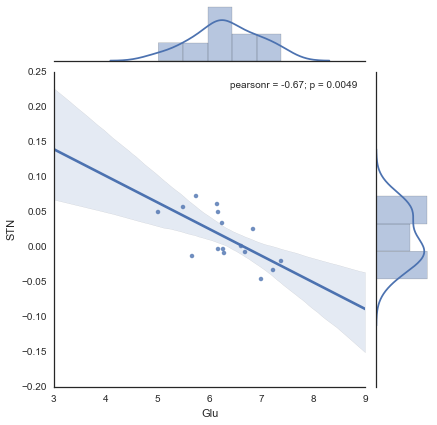

In [62]:
drop = ['LMIT']
#drop = []
sns.jointplot(data = CONTROLS_STR.drop(drop,axis = 0), x = 'Glu', y = 'STN', kind = 'reg')

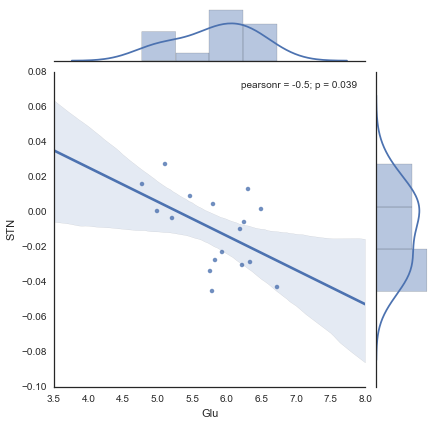

In [65]:
sns.jointplot(data = PATIENTS_STR.drop(drop_p,axis = 0), x = 'Glu', y = 'STN', kind = 'reg')

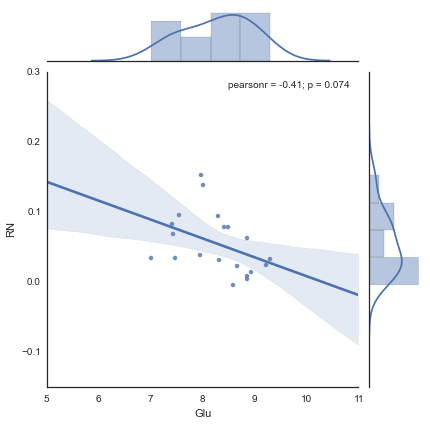

In [78]:
c_acc  =  get_df('controls', 'a', 'ACC')
p_acc  =  get_df('patients', 'a', 'ACC')
CONTROLS_ACC = pd.concat([c_acc, iron_controls], axis =1)
PATIENTS_ACC = pd.concat([p_acc, iron_patients], axis =1)

sns.jointplot(data = CONTROLS_ACC.drop(drop,axis = 0), x = 'Glu', y = 'RN', kind = 'reg')

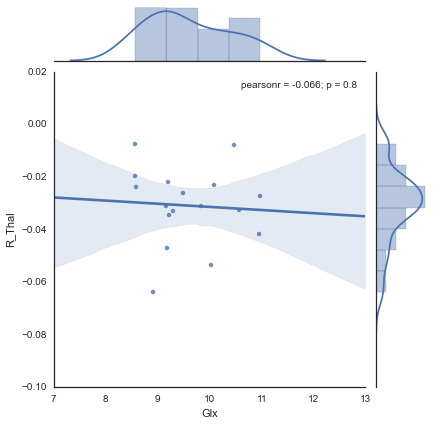

In [85]:
c_tha  =  get_df('controls', 'a', 'THA')
p_tha  =  get_df('patients', 'a', 'THA')
CONTROLS_THA = pd.concat([c_tha, iron_controls], axis =1)
PATIENTS_THA = pd.concat([p_tha, iron_patients], axis =1)

sns.jointplot(data = CONTROLS_THA.drop(['TR4T'],axis = 0), x = 'Glx', y = 'R_Thal', kind = 'reg')

In [82]:
CONTROLS_THA.Glu

BH5T    6.531971
EC9T    6.204628
GF3T    6.275528
GH4T    6.603684
GHAT    6.638961
GSAT    6.857892
GSNT         NaN
HCTT    5.434613
HM1X    6.429348
HM2X    5.997799
HR8T    6.078209
KDET    7.392987
KO4T    5.674173
LL5T    6.250469
LMIT    7.643658
MJBT    6.122228
NP4T    6.279257
PAHT    5.976371
PU2T    6.409822
RA7T         NaN
RB1T    5.376206
RJBT    5.705251
RJJT    7.346662
RMNT    5.198935
SDCT         NaN
SI5T    5.571140
SJBT    6.017743
SMVX    6.121211
SS1X    6.740946
STQT    5.480936
TJ5T    6.695773
TR4T    9.738425
TSCT    5.760608
TV1T         NaN
ZT5T    6.382396
Name: Glu, dtype: float64